# 2.EDA

### Liberías

In [1]:
#Tratamiento de los datos
import numpy as np
import pandas as pd
#Visualización
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy.stats as stats
#Estadisticas
from scipy.stats import f_oneway,pearsonr, ttest_ind, ttest_rel, shapiro, levene, mannwhitneyu, kruskal, chi2_contingency, normaltest,skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
import sys
import os
#Missing
from missingno import matrix
import missingno as msno
#mapa
import plotly.express as px
import pycountry


### Carga de datos

In [2]:
df=pd.read_csv('/Users/isaromobru/Desktop/EDA/data/processed/datos_procesados3.csv')

In [3]:
text_columns = ['sexo', 'nivel_laboral', 'moneda', 'note_source.label', 'País']

for col in text_columns:
    df[col] = df[col].astype('category')

In [4]:
df['año']=pd.to_datetime(df['año'],format='%Y').dt.year

In [5]:
df.dtypes

País                 category
sexo                 category
nivel_laboral        category
año                     int32
prom_ganancias        float64
moneda               category
note_source.label    category
dtype: object

In [6]:
df.head()

,País,sexo,nivel_laboral,año,prom_ganancias,moneda,note_source.label
0,Austria,Total,Total,2018,17.42,Working time arrangement coverage: Full-time a...,Data reference period: October | Economic acti...
1,Austria,Total,Directores y gerentes,2018,36.58,Working time arrangement coverage: Full-time a...,Data reference period: October | Economic acti...
2,Austria,Total,Profesionales científicos e intelectuales,2018,24.81,Working time arrangement coverage: Full-time a...,Data reference period: October | Economic acti...
3,Austria,Total,Técnicos y profesionales de nivel medio,2018,19.93,Working time arrangement coverage: Full-time a...,Data reference period: October | Economic acti...
4,Austria,Total,Personal de apoyo administrativo,2018,16.48,Working time arrangement coverage: Full-time a...,Data reference period: October | Economic acti...


## 2.1 Analisis Univariante

### Variables numéricas

In [7]:
#Estadísticas descriptivas
col_num = df.select_dtypes(include=["number"]).columns



for col in col_num:
    print(col)
    print(df[col].describe())
    print('moda',df[col].mode()[0])
    print('curtosis',df[col].kurtosis())
    print('asimetria',df[col].skew())
    print('varianza',df[col].var())
    print('=='*20)
   

año
count    3582.000000
mean     2016.983529
std         2.822894
min      2013.000000
25%      2014.000000
50%      2017.000000
75%      2019.000000
max      2023.000000
Name: año, dtype: float64
moda 2014
curtosis -0.9742304455179438
asimetria 0.37949803769577495
varianza 7.968731694090547
prom_ganancias
count    3563.000000
mean       15.401392
std        11.931298
min         0.000000
25%         7.000000
50%        12.050000
75%        19.125000
max        81.770000
Name: prom_ganancias, dtype: float64
moda 13.0
curtosis 3.5217319023695755
asimetria 1.7277104858483137
varianza 142.3558781850805


### Análisis de los resultados de las estadísticas descriptivas
1. Años:
  - Hay un registro de 3582, es decir, es la cantidad de años proporcionados en el dataset. 
  - La media es de 2016,98, esto quiere decir que el año promedio esta alrededor del año 2017
  - La desviación típica, que nos muestra las dispersión de los datos, en este caso, 2,82    años, por  lo que sugiere una dispersión de alrededor de 3 años entre los dato. 
  - Los años se encuentran reunidos entre el año 2014 y 2019, mas adelante con el gráfico de boxplot se verá con más claridad.
  - El año minimo es el 2013 y el máximo el 2023 
  - El año que más se repite es el 2014
  - La curtosis con un -0,97 , nos indica que la distribucion de los años es plana y no muestra grandes picos. Debido a que es menor a 3 es platicúrtica
  - Asimetría: La asimetría de 1.72 significa que la mayoría de los registros están en años más antiguos, pero hay algunos años recientes (como 2023) con menos datos que son mucho más altos y están alejados del promedio, creando un sesgo hacia la derecha.
  - La varianza: mide cuanto de dispersos estas los datos respecto a la media, en este caso es de 7,97, lo que nos indica que los datos están bastante agrupados areddor de la media.
2. Promedio de ganancias:
  - Hay un registro de 3563, es decir, es la cantidad de datos de las ganancias proporcionados en el dataset
  - La media es de 15.40 euros por hora.
  - La desviación estándar es de 11.93, por lo que nos muestra una dispersión alta entre los datos.
  - El mínimo es de 0 y el máximo de 81,77
  - La distribución de las ganancias nos muestra que menos del 25% de la población gana menos de 7 euros por hora, la mitad de las personas ganan menos de 12,05 y el 75% gana menos de 19,03 
  - La curtosis con 3,52 nos indica una distribución leptocurtica ya que es mayor que 3, o que quiere decir que tiene colas más pesadas y un pico más alto que una distribución normal, lo que indica que hay valores extremos.
  - La Varianza con 142,36, muestra una gran dispersión entre los datos  y que hay valores muy extremos


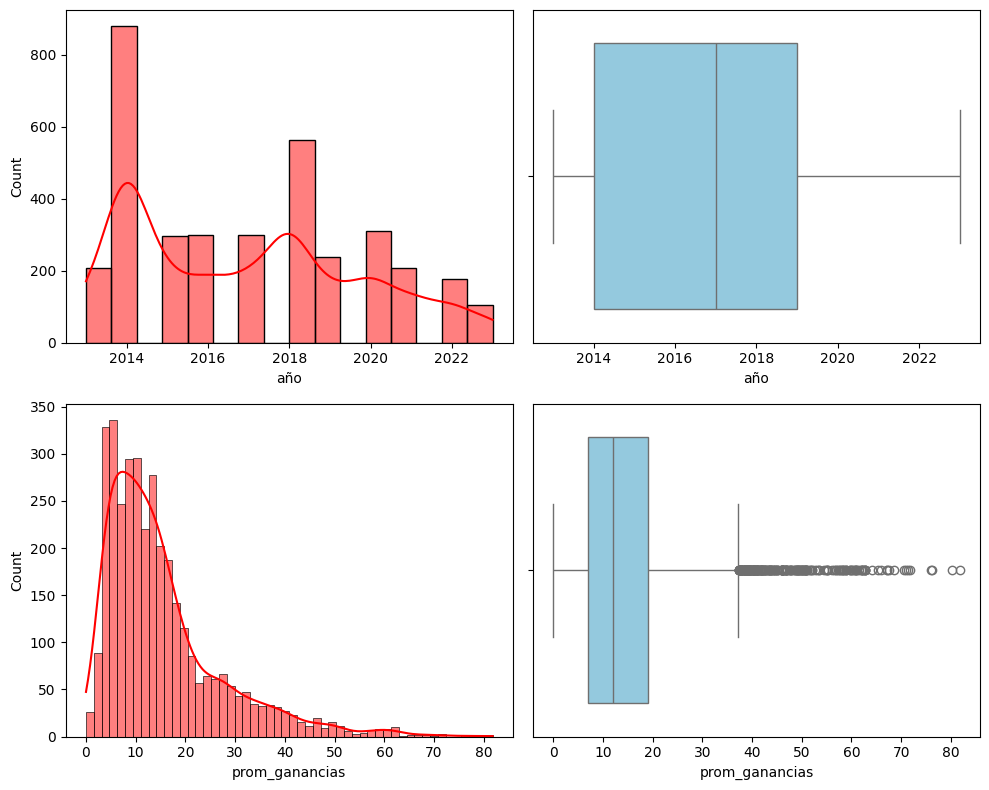

In [8]:
# Seleccionar variables numericas
col_num = df.select_dtypes(include=["float64", "Int32"]).columns

# Configuración del gráfico
n_rows = len(col_num)
fig, axes = plt.subplots(n_rows, 2, figsize=(10, 4 * n_rows))

# Si axes es 1D (en caso de solo 1 fila), lo convertimos en 2D
if n_rows == 1:
    axes = axes.reshape(1, 2)

# Graficar para cada columna numérica
for idx, column in enumerate(col_num):
    # Histograma
    sns.histplot(df[column], kde=True, ax=axes[idx, 0], color='red')
       
   
    # Boxplot horizontal
    sns.boxplot(x=df[column], ax=axes[idx, 1], color='skyblue')
  

# Ajuste
plt.tight_layout()
plt.show()


## Análisis de los gráficos. 
1. Años:
- Histograma:
  * El histograma muestra la distribución de los años, se puede observar la moda en 2014 y casi podriamos decir que es bimodal debido al pico del 2018.
  * Se puede observar que la mayoría de los datos se encuentra en los años más antiguos, viendo un descenso en los años como 2022 o 2023, una hipotesis de porque falten puede ser debido a la falta de datos después de la pandemia. 
- Boxplot:
  * los años van del 2013 al 2023
  * La mediana, que es el centro del boxplot es el año 2017
  * el 25 % de los datos esta en 2014 y el 75 % estan por debajo del año 2019. 
  * No hay outliers y se muestra datos bastantes simetricos alrededor de la mediana. 

2. Promedio de gannacias:
 - Histograma:
   * La mayoría de individuos ganan entre 0 y 20, donde se encuentra la mayor concentración de la curva 
   * A medida que aumenta el promedio del salario disminuye la cantidad de individuos, creando una cola larga hacia la derecha. 
   * La linea nos indica que el promedio de gannacias tiene una asimetría positiva, también se puede ver mediante la media y la moda, ya que la media es mayor que la mediana.
  - Boxplot:
    * Lo que más destaca de la distribución de las ganancias es la gran cantidad de outliers, por lo que hay individuos que gana una gran cantidad de dinero en comparación  con la mayoría.
    * La mayoría de las ganancias se encuentra entre 7 y 19 y la mediana, como se podia observar en el anális descriptivo.
    
### Resumen
- El analisis para observar los países se realizará en el año 2014 debido a que es el año que más datos se tiene
- Hay una gran cantidad de Outliers, esto signifca que hay una gran disparidad en el promedio de ganancias entre los individuos

## Prueba de normalidad 

### 1. Prom_ganancias

In [9]:
df2= df['prom_ganancias'].dropna()
df2.isna().sum()

np.int64(0)

In [10]:
#  Prueba de D'Agostino
stat, p_valor = normaltest(df2)

# Mostrar los resultados
print("Estadístico de prueba:", stat)
print("P-valor:", p_valor)

# Interpretación
if p_valor > 0.05:
    print("No se puede rechazar la hipótesis nula: los datos tienen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no tienen una distribución normal.")

Estadístico de prueba: 1186.0341605460699
P-valor: 2.8572902750320396e-258
Se rechaza la hipótesis nula: los datos no tienen una distribución normal.


Como el P- valor está muy por debajo de 0,05, se rechaza la hipotesis nula y muestra que los datos no muestran una distribución normal, aunque ya se podía confirmar mediante los datos de curtosis y gráficos.


## 2. Año

In [11]:
df3=df['año']
#  Prueba de D'Agostino
stat, p_valor = normaltest(df3)

# Mostrar los resultados
print("Estadístico de prueba:", stat)
print("P-valor:", p_valor)

# Interpretación
if p_valor > 0.05:
    print("No se puede rechazar la hipótesis nula: los datos tienen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no tienen una distribución normal.")

Estadístico de prueba: 786.0081652179827
P-valor: 2.0916815105262303e-171
Se rechaza la hipótesis nula: los datos no tienen una distribución normal.


Como el P- valor está muy por debajo de 0,05, se rechaza la hipotesis nula y muestra que los datos no muestran una distribución normal, aunque ya se podía confirmar mediante los datos de curtosis y gráficos.


Aquí se puede observar que cuales son los datos perdidos, la mayoría son de los años posteriores al 2020, por lo que puede tener una relación con el sesgo provocado por la pandemia de covid-19.

Seguramente los datos con 0 serán un fallo de imputación, por lo que se debería decidir que hacer con ellos

## Análisis de variables categoricas

In [12]:
df.columns

Index(['País', 'sexo', 'nivel_laboral', 'año', 'prom_ganancias', 'moneda',
       'note_source.label'],
      dtype='object')

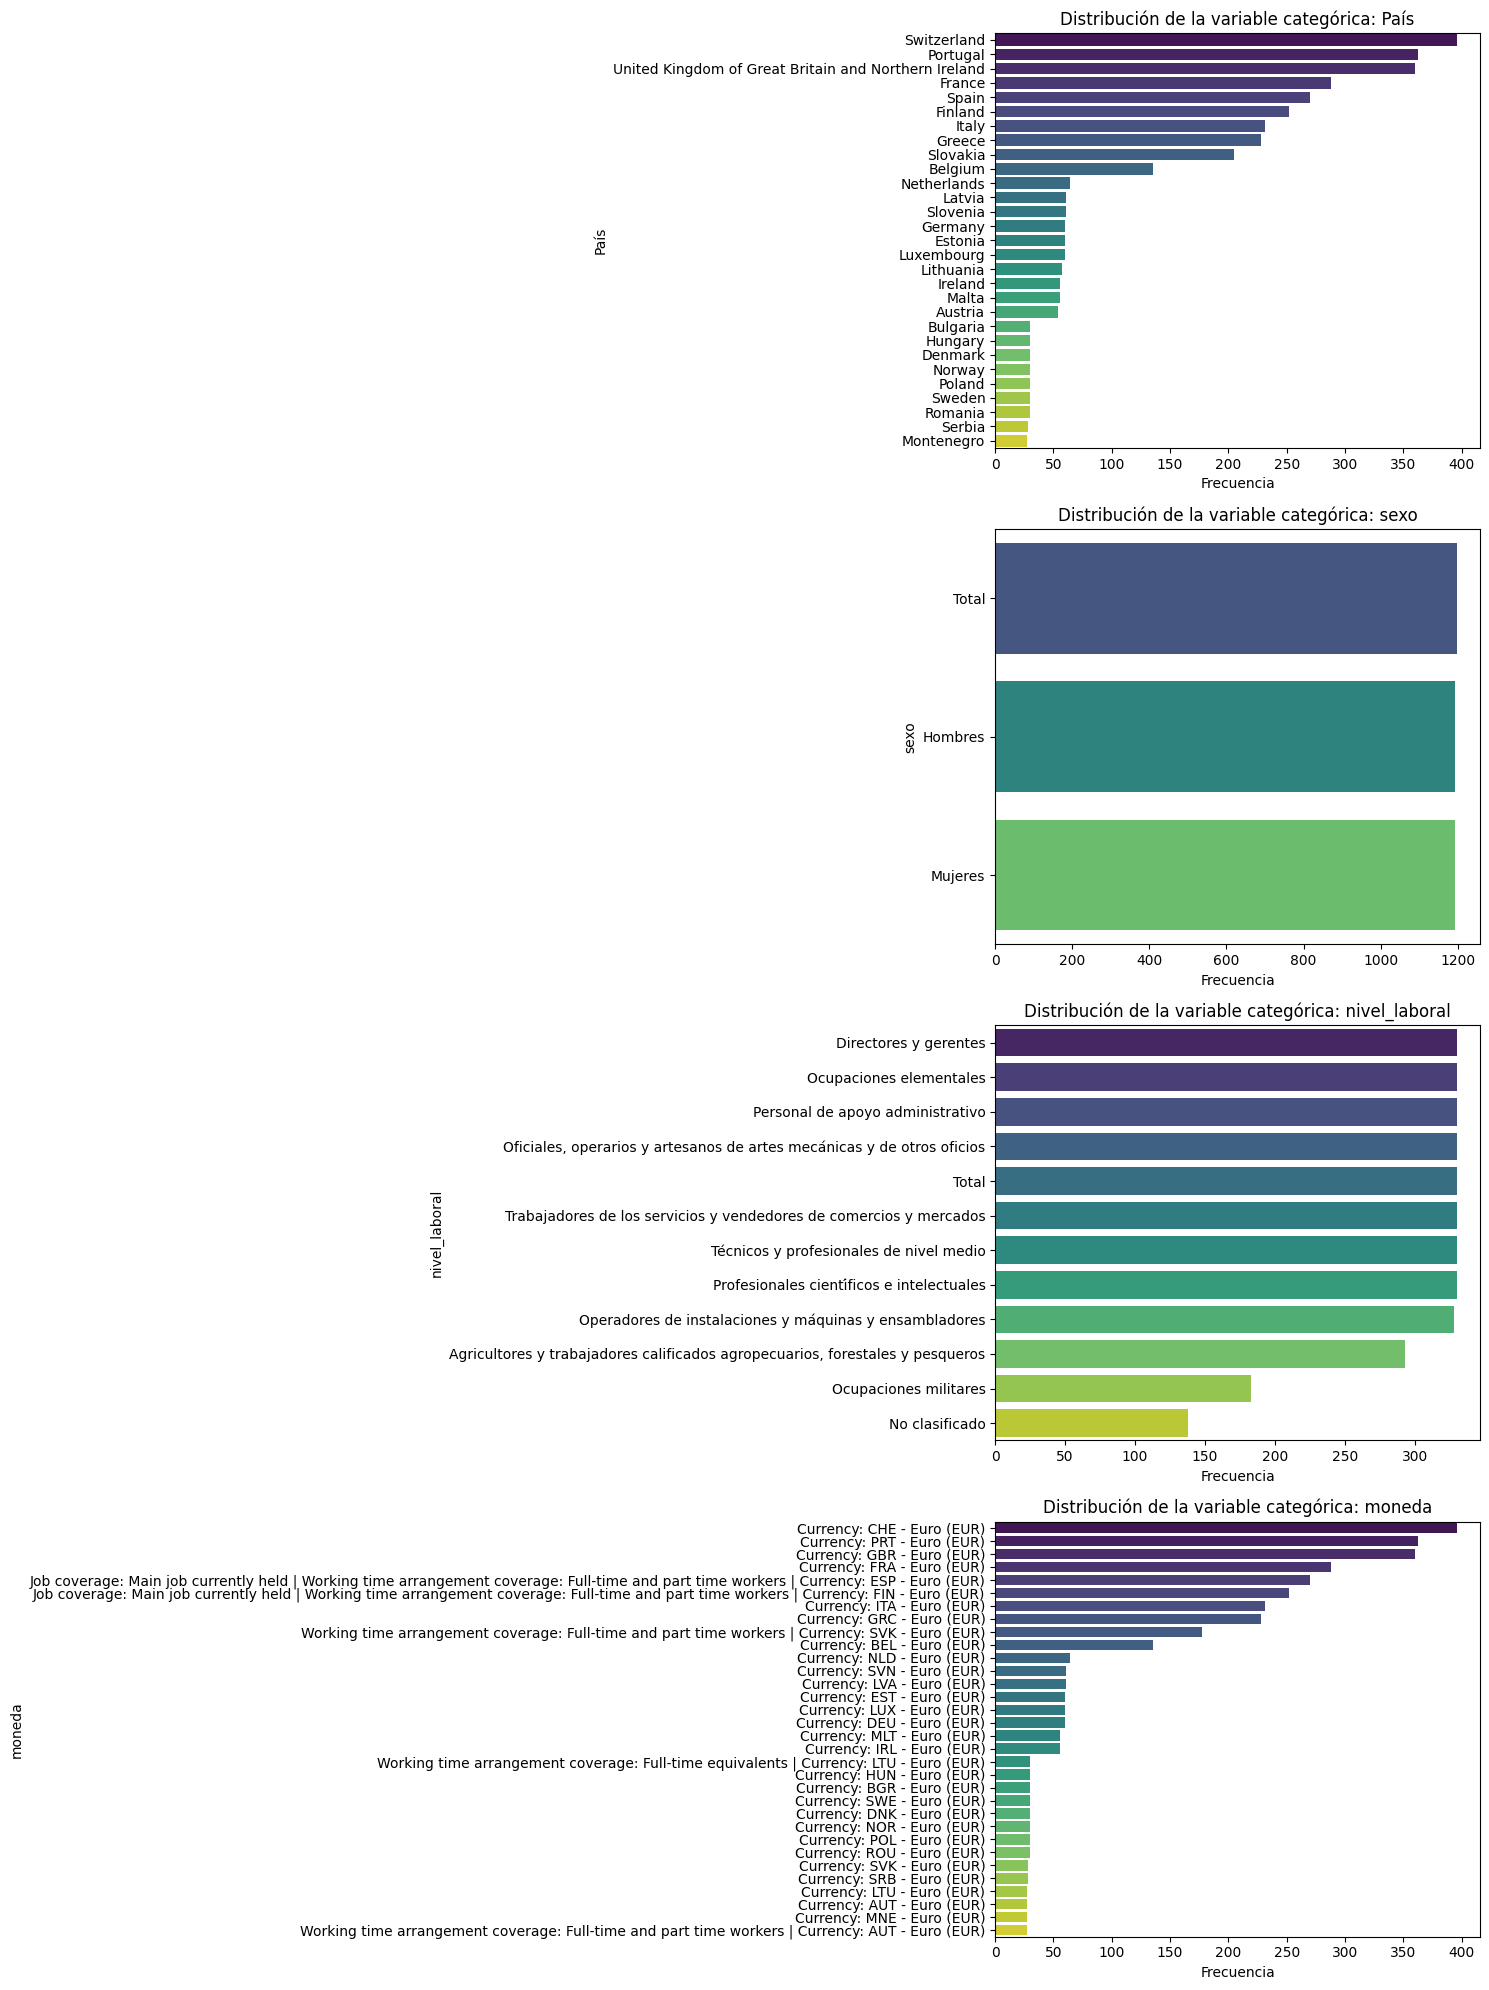

In [13]:
# Crear gráficos de conteo para variables categóricas
categorical_columns = ['País', 'sexo', 'nivel_laboral', 'moneda']

# Configuración del gráfico
plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 1, i)
    sns.countplot(data=df, y=column, palette="viridis", order=df[column].value_counts().index)
    plt.title(f"Distribución de la variable categórica: {column}")
    plt.xlabel("Frecuencia")
    plt.ylabel(column)
    plt.tight_layout()
#plt.savefig()
plt.show()


Con estos gráficos se puede observar la frecuencias de las variables categóricas que tenemos en el dataset. Algunas nos proporcionan más información que otras, por ejemplo, la de moneda a la hora de la investigación no nos aporta gran información.
- El primer gráfico nos  muestra cuales son los países que hay mas datos, como es el caso de Switzerland, Portugal o Gran Bretaña. 
- El segundo gráfico muestra la proporción de hombres y mujeres que hay en el dataset, esto si nos da una información revelante debido a que es importante al comparar tque las proporciones de hombres y mujeres sean las mismas. 
- El tercer grupo nos muestra la distribución de las diferentes profesiones y como están repartidas, la mayoría tienen la misma proporción menos 'Skilled agricultural, foresty and fishery workers', 'Armed forces' y trabajos no clasificados. 

In [14]:
# Análisis de frecuencias

for col in text_columns:
     print(f"\nFrecuencias para {col}:")
     freq_abs = df[col].value_counts()
     freq_rel = df[col].value_counts(normalize=True)
     freq_df = pd.DataFrame({
         'Frecuencia Absoluta': freq_abs,
         'Frecuencia Relativa (%)': freq_rel * 100
     })
     print(freq_df)




Frecuencias para sexo:
         Frecuencia Absoluta  Frecuencia Relativa (%)
sexo                                                 
Total                   1198                33.445003
Hombres                 1192                33.277499
Mujeres                 1192                33.277499

Frecuencias para nivel_laboral:
                                                    Frecuencia Absoluta  \
nivel_laboral                                                             
Directores y gerentes                                               330   
Ocupaciones elementales                                             330   
Personal de apoyo administrativo                                    330   
Oficiales, operarios y artesanos de artes mecá...                  330   
Total                                                               330   
Trabajadores de los servicios y vendedores de c...                  330   
Técnicos y profesionales de nivel medio                            330  

In [15]:
# Resumen de valores únicos por cada columna categórica
category_summary = {
    "País": df["País"].nunique(),
    "sexo": df["sexo"].unique(),
    "nivel_laboral": df["nivel_laboral"].unique(),
    "moneda": df["moneda"].nunique()
}

# Distribución de valores en 'sexo' y 'nivel_laboral'
sexo_counts = df["sexo"].value_counts()
nivel_laboral_counts = df["nivel_laboral"].value_counts()

category_summary, sexo_counts, nivel_laboral_counts


({'País': 29,
  'sexo': ['Total', 'Hombres', 'Mujeres']
  Categories (3, object): ['Hombres', 'Mujeres', 'Total'],
  'nivel_laboral': ['Total', 'Directores y gerentes', 'Profesionales científicos e intelectuales', 'Técnicos y profesionales de nivel medio', 'Personal de apoyo administrativo', ..., 'Operadores de instalaciones y máquinas y ens..., 'Ocupaciones elementales', 'Agricultores y trabajadores calificados agrop..., 'Ocupaciones militares', 'No clasificado']
  Length: 12
  Categories (12, object): ['Agricultores y trabajadores calificados agrop..., 'Directores y gerentes', 'No clasificado', 'Ocupaciones elementales', ..., 'Profesionales científicos e intelectuales', 'Técnicos y profesionales de nivel medio', 'Total', 'Trabajadores de los servicios y vendedores de...],
  'moneda': 32},
 sexo
 Total      1198
 Hombres    1192
 Mujeres    1192
 Name: count, dtype: int64,
 nivel_laboral
 Directores y gerentes                                                            330
 Ocupac

Mediante las tablas de frencuencias podemos ver de manera cuantitatica los gráficos y podemos observar que todos tienen valores parecidos. 

In [16]:
cardinalidades = df.nunique()
cardinalidades_porcentaje = (df.nunique() / len(df)) * 100
# Clasificar usando map y lambda
categorias = cardinalidades.map(lambda x: 'Baja' if x < 10 else ('Media' if x <= 50 else 'Alta'))
cardinalidad=pd.DataFrame({'card_abs':cardinalidades,'card_relat(%)':cardinalidades_porcentaje,'Tipo':categorias})
cardinalidad

,card_abs,card_relat(%),Tipo
País,29,0.809604,Media
sexo,3,0.083752,Baja
nivel_laboral,12,0.335008,Media
año,11,0.307091,Media
prom_ganancias,1940,54.159687,Alta
moneda,32,0.893356,Media
note_source.label,14,0.390843,Media


1. Columnas con alta cardinalidad:
    - Prom_ganancias: muy diversa 
2. Columnas con baja cardinalidad:
    -  Sexo: Columna sencilla
3. Columnas con cardinalidad media:
    - nivel_laboral: diversidad moderada (12 tipos)
    - Moneda: diversidad moderada(32)
    - Países:diversidad moderada (29)
    - note_source.label:diversidad moderada (14)
    - año:diversidad moderada(11)

# Analisis 2014

In [17]:
#Filtrar año 2014
df4 = df[df['año'] == 2014]
#Guardar en una variable 
df4.to_csv('datos_2014.csv', index=False)
df4.copy()

,País,sexo,nivel_laboral,año,prom_ganancias,moneda,note_source.label
27,Austria,Total,Total,2014,15.93,Currency: AUT - Euro (EUR),Repository: Eurostat | Data reference period: ...
28,Austria,Total,Directores y gerentes,2014,34.60,Currency: AUT - Euro (EUR),Repository: Eurostat | Data reference period: ...
29,Austria,Total,Profesionales científicos e intelectuales,2014,23.42,Currency: AUT - Euro (EUR),Repository: Eurostat | Data reference period: ...
30,Austria,Total,Técnicos y profesionales de nivel medio,2014,18.65,Currency: AUT - Euro (EUR),Repository: Eurostat | Data reference period: ...
31,Austria,Total,Personal de apoyo administrativo,2014,15.14,Currency: AUT - Euro (EUR),Repository: Eurostat | Data reference period: ...
...,...,...,...,...,...,...,...
3577,Sweden,Mujeres,Trabajadores de los servicios y vendedores de ...,2014,16.58,Currency: SWE - Euro (EUR),Repository: Eurostat | Data reference period: ...
3578,Sweden,Mujeres,Agricultores y trabajadores calificados agrope...,2014,15.58,Currency: SWE - Euro (EUR),Repository: Eurostat | Data reference period: ...
3579,Sweden,Mujeres,"Oficiales, operarios y artesanos de artes meca...",2014,17.52,Currency: SWE - Euro (EUR),Repository: Eurostat | Data reference period: ...
3580,Sweden,Mujeres,Operadores de instalaciones y máquinas y ensa...,2014,17.80,Currency: SWE - Euro (EUR),Repository: Eurostat | Data reference period: ...


In [18]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 27 to 3581
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   País               881 non-null    category
 1   sexo               881 non-null    category
 2   nivel_laboral      881 non-null    category
 3   año                881 non-null    int32   
 4   prom_ganancias     880 non-null    float64 
 5   moneda             881 non-null    category
 6   note_source.label  881 non-null    category
dtypes: category(5), float64(1), int32(1)
memory usage: 25.2 KB


In [19]:
df4.head()

,País,sexo,nivel_laboral,año,prom_ganancias,moneda,note_source.label
27,Austria,Total,Total,2014,15.93,Currency: AUT - Euro (EUR),Repository: Eurostat | Data reference period: ...
28,Austria,Total,Directores y gerentes,2014,34.60,Currency: AUT - Euro (EUR),Repository: Eurostat | Data reference period: ...
29,Austria,Total,Profesionales científicos e intelectuales,2014,23.42,Currency: AUT - Euro (EUR),Repository: Eurostat | Data reference period: ...
30,Austria,Total,Técnicos y profesionales de nivel medio,2014,18.65,Currency: AUT - Euro (EUR),Repository: Eurostat | Data reference period: ...
31,Austria,Total,Personal de apoyo administrativo,2014,15.14,Currency: AUT - Euro (EUR),Repository: Eurostat | Data reference period: ...


In [20]:
df4.año.value_counts()

año
2014    881
Name: count, dtype: int64

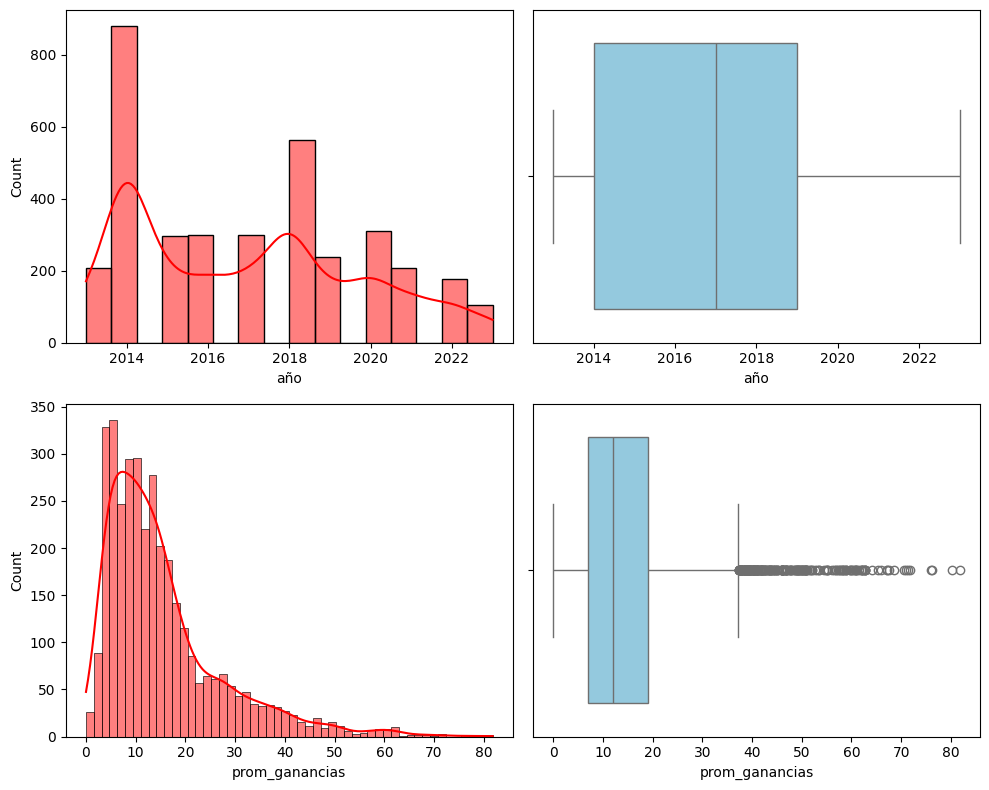

In [21]:
# Seleccionar variables numericas
col_num = df4.select_dtypes(include=["float64", "Int32"]).columns

# Configuración del gráfico
n_rows = len(col_num)
fig, axes = plt.subplots(n_rows, 2, figsize=(10, 4 * n_rows))

# Si axes es 1D (en caso de solo 1 fila), lo convertimos en 2D
if n_rows == 1:
    axes = axes.reshape(1, 2)

# Graficar para cada columna numérica
for idx, column in enumerate(col_num):
    # Histograma
    sns.histplot(df[column], kde=True, ax=axes[idx, 0], color='red')
       
   
    # Boxplot horizontal
    sns.boxplot(x=df[column], ax=axes[idx, 1], color='skyblue')
  

# Ajuste
plt.tight_layout()
plt.show()


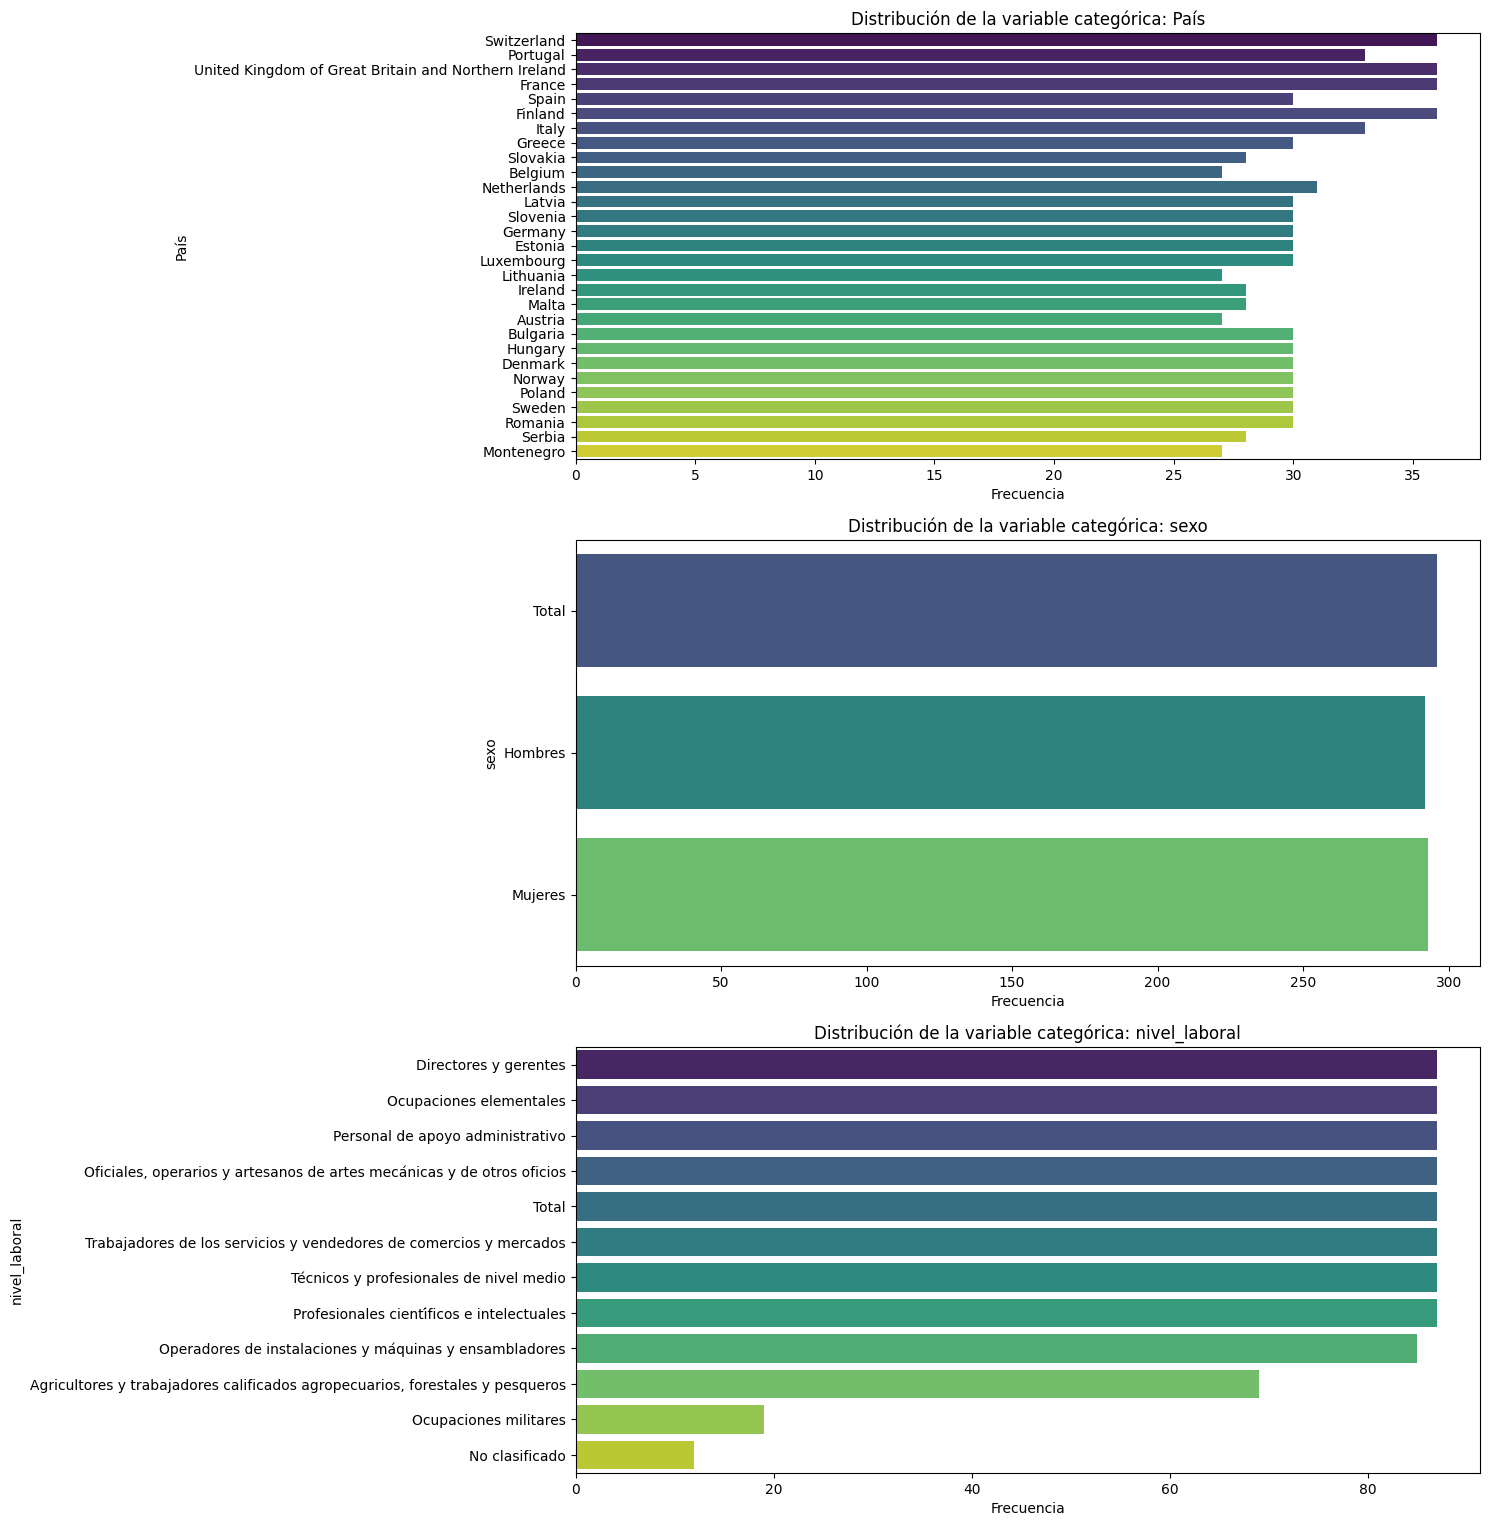

In [22]:
# Crear gráficos de conteo para variables categóricas
categorical_columns = ['País', 'sexo', 'nivel_laboral']

# Configuración del gráfico
plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 1, i)
    sns.countplot(data=df4, y=column, palette="viridis", order=df[column].value_counts().index)
    plt.title(f"Distribución de la variable categórica: {column}")
    plt.xlabel("Frecuencia")
    plt.ylabel(column)
    plt.tight_layout()
#plt.savefig()
plt.show()


### Relación Salario-País

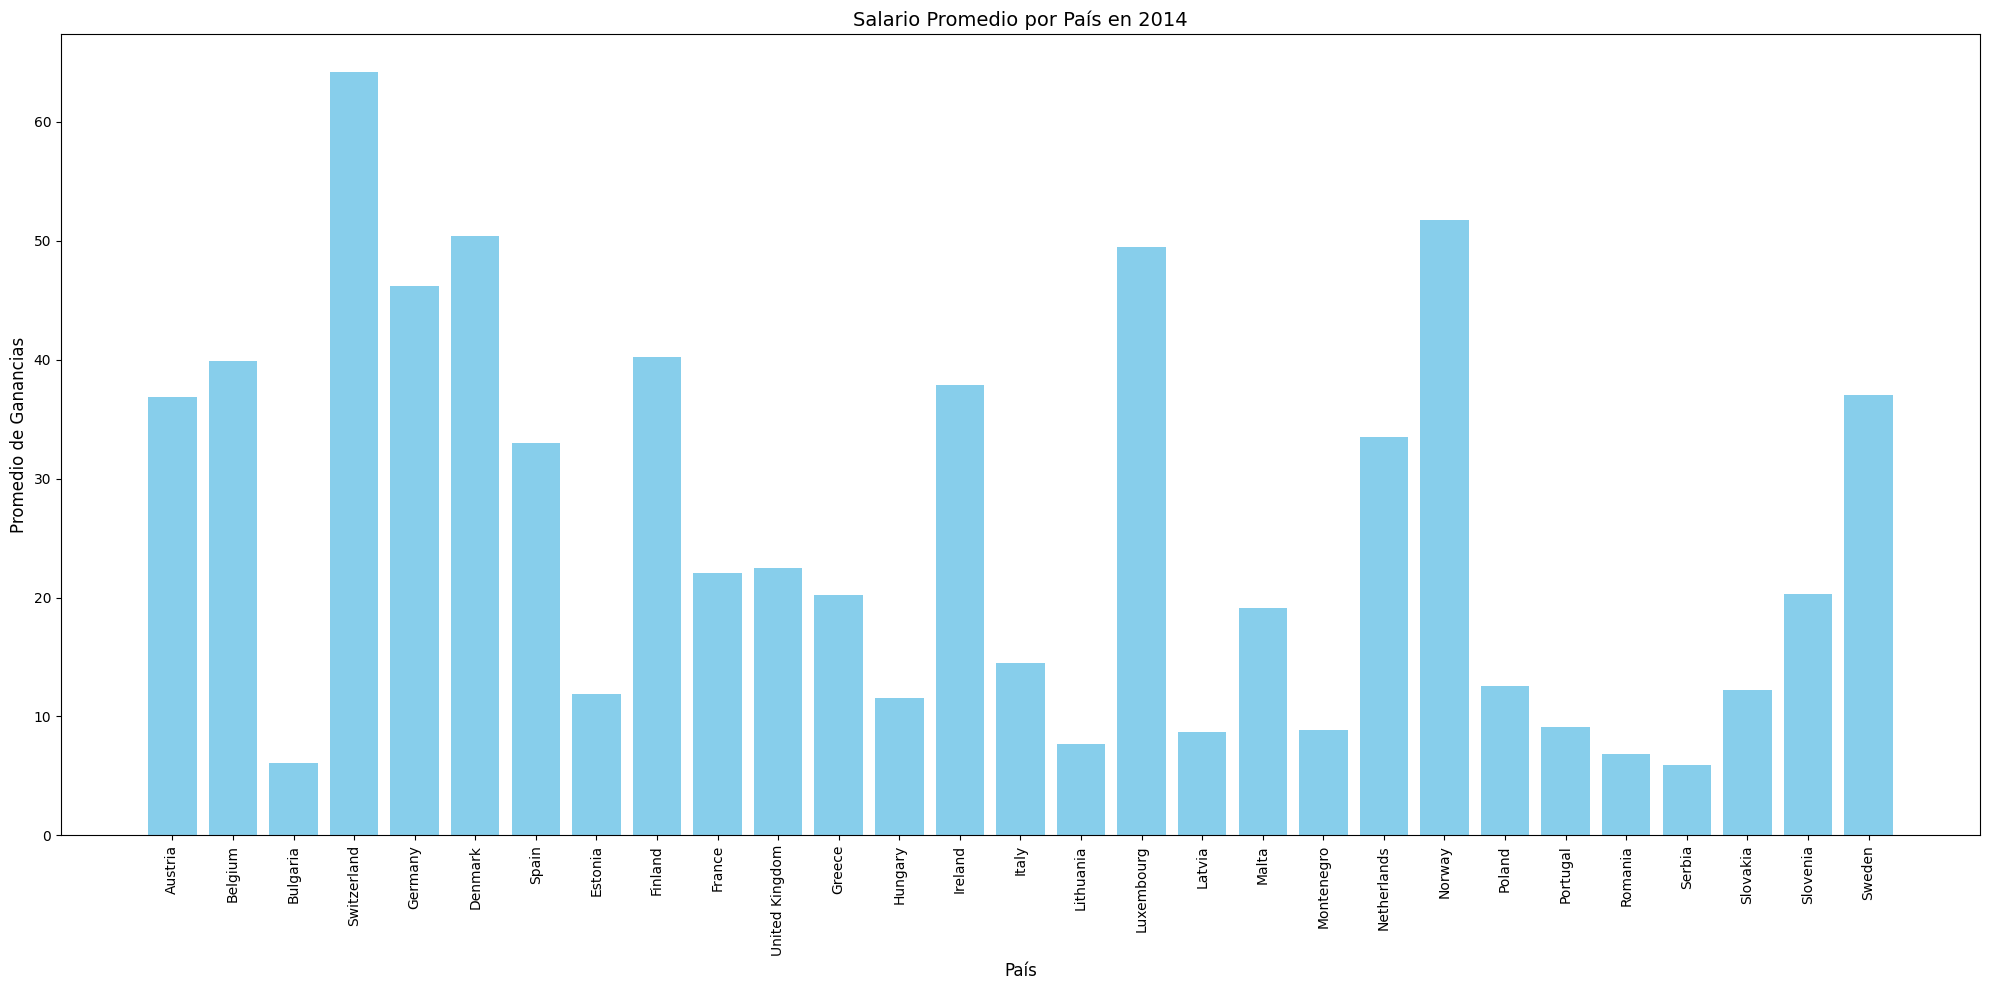

In [23]:
# Reemplazar el nombre para que quede mejor
df4['País'] = df4['País'].replace({'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'})

# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 10))  # Aumenta el ancho si hay muchas etiquetas

# gráfico de barras 
plt.bar(df4['País'], df4['prom_ganancias'], color='skyblue')


# Ajustar etiquetas
plt.xticks(rotation=90, fontsize=10)  
plt.xlabel('País', fontsize=12)
plt.ylabel('Promedio de Ganancias', fontsize=12)



# Título
plt.title('Salario Promedio por País en 2014', fontsize=14)

# Ajustar márgenes
plt.tight_layout()

# Mostrar gráfico
plt.show();


En este gráfico se muestra la relación del promedio de ganancias  por hora en el año 2014 por país, donde se puede observar las diferentes diferencias salariales sin tener en cuenta el género. Dentro de Europa existe grandes disparidades entre los países, por ejemplo, el país que más dinero gana por hora es Suiza cerca de 40 euros la hora o Noruega con30 euros la hora, sin embargo, hay otros países como Rumania, Serbia que no llegan los 5 euros por hora. 


### Relacion ganancias promedio por pais y genero

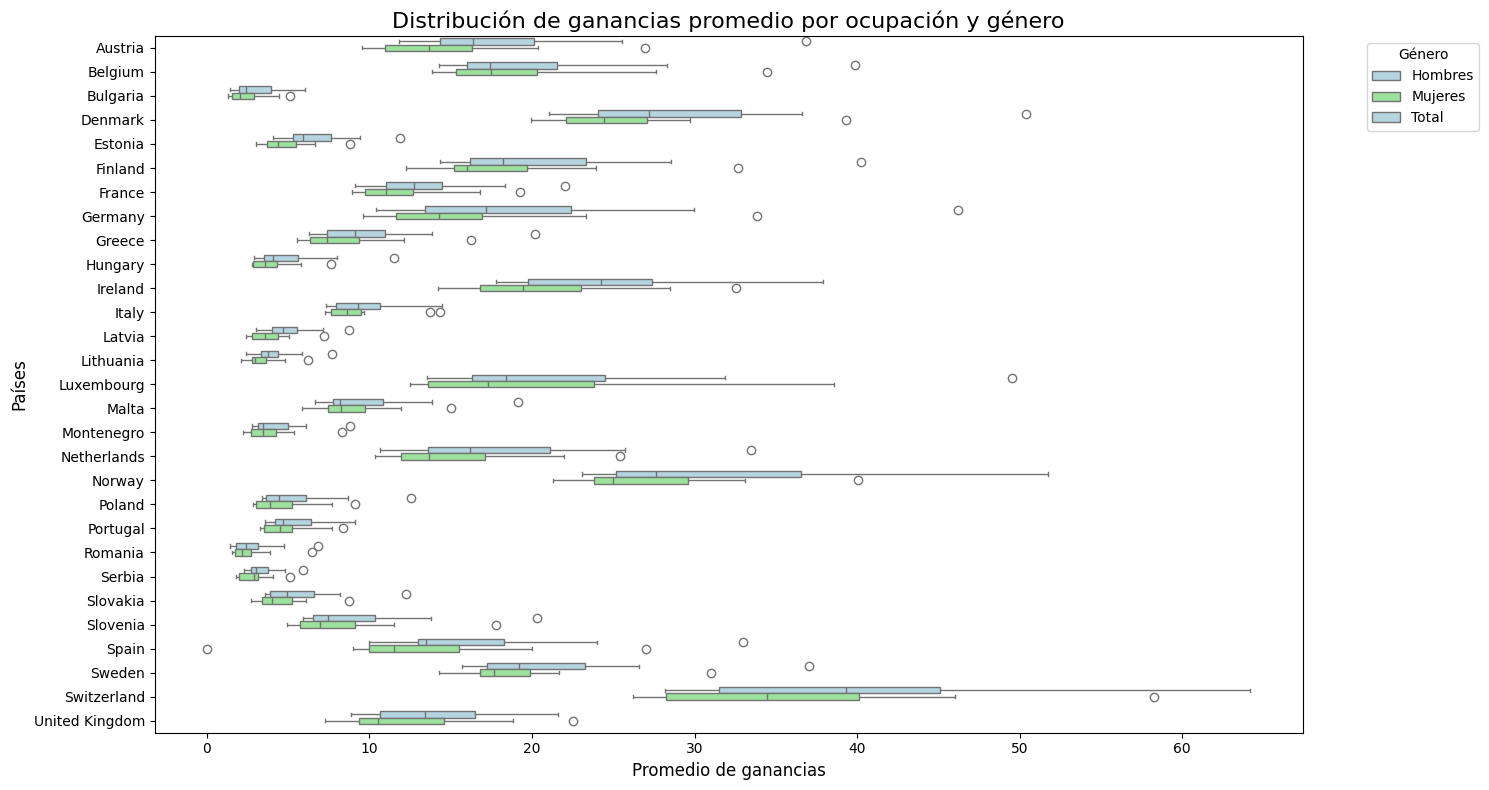

In [24]:
df4_filtrado = df4[df4['sexo'] != 'Total']
plt.figure(figsize=(15, 8))  
sns.set_palette("Paired")  

sns.boxplot(data=df4_filtrado, x="prom_ganancias", y="País",palette=["lightblue","lightgreen"], hue="sexo",orient="h")

# Mejorar etiquetas y títulos
plt.title("Distribución de ganancias promedio por ocupación y género", fontsize=16)
plt.xlabel("Promedio de ganancias", fontsize=12)
plt.ylabel("Países", fontsize=12)

# Ajustar leyenda
plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajustar diseño
plt.tight_layout()  # Evitar solapamientos
plt.show()

En este gráfico de boxpplot nos da bastante informmación sobre la diferencia entre hombres y mujeres en los países de la Unión Europea en el año 2014. 

haciendo una vista general, se puede observar que todos los países muestran una desigualdad entre hombres y mujeres, ya que los bigotes son mayores y las medianas en todos los países son mayores en hombres que en mujeres.
1. Países con salarios moderadamente altos
    - Austria: 
     La mediana en los hombres coincide con el 75% del salario promedio de las mujeres, esto quiere decir que al menos el 75% de las mujeres en Austria ganan lo mismo que al menos el 50% de los hombres, por lo cual la mayorñia de los hombres ganan mucho más dinero que las mujeres. Ademas, hay presencia de Outliers en ambos casos, es decir, casos excepcionales que ganan mas, sin embargo, el valor de la mujer esta bastante por debajo de outliers del hombre.
    - Bélgica:
     Las medianas de los hombres y las mujeres es practicamente igual, por lo que podemos decir que este país no presenta una brecha salarial muy marcada. Si que muestra diferencias significativas en los Outliers y que los extremos son un poco más bajos en las mujeres. 
    -Dinamarca: 
    Ocurre similar que en Austria, el percentil 25% de los hombres coincide con la mediana de las mujeres, esto quiere decir que los mujeres están por debajo que las mujeres. 
    -Alemania: 
    La extensión del boxplot en hombres está movido hacia la derecha, es decir, ademas coincide la mediana de los hombres con el percentil 75% de las mujeres. Cabe destacar que existe un outliers en las mujeres, por encima de lo que gana los hombres. 
2. Países con Salarios más Altos:
    - Suiza:
    Es el país con los salarios más altos y presenta una bracha salarial muy marcada. La mediana de los hombres es bastante cercana al percentil 75% de las mujeres, por lo que el 75% de las mujeres ganan menos que el 50 % de los hombres. Los extremos del  boxplot en los hombres muestran que hay gran disparidad entre los salarios promedios, el de las mujeres es más corto.
    - Noruega:
     Ocurre algo muy similar a Suiza, aunque las diferencias son menos pronunciadas que en Suiza
    - Luxemburgo: 
    Las diferencias entre las medianas no es tan grande como en otros casos, ademas en el caso de las  mujeres existen outliers muy altos, alrededor de 50, sin embargo el primer cuartil, la mediana y el tercer cuartil son menos que en los hombres, a pesar de este dato excepcional.
    - Irlanda:  
    Muestra una gran diferencia entre las medianas en los diferentes sexos, coincidiendo la mediana de las mujeres con el primer cuartil de los hombres, mostrando el desplazamiento a la derecha, y en consecuencia, los salarios más altos de los hombres. Las mujeres muestran un Outliers, sin embargo, coincide con el extremo de los hombres.
    - Filandia y Suecia:
    Los países nórdicos muestran datos similares, ya que la mediana de los hombres es bastante superior que el de las mujeres, coincidiendo con el primer cuartil, sin e,bargo, los salarios en Suecia se encuentran más concentrados que los de Filandia.
3. Países con salarios bajos:
    - Portugal, Polonia, Malta, Bulgaria, Lituania, Montenegro, Rumanía, Serbia, Eslovaquía y Eslovenía: Son países que tienen unos salarios más bajos, sin embargo las medianas de entre hombres y mujeres son muy similares. También cabe destacar que los salarios promedio estan muy concentrados, es decir, el rango intercuartílico es muy pequeño, por lo que los salarios son similares.Aún así, se puede observar que los hombres ganan más y la presencia de outliers.
    - España, Francia, Gran Bretaña, Grecia, Italia, Estonia, Letonia: Estos países  la mayoría tienen unos salarios promedio un poco mayores, sin embargo, se muestra más diferencia entre las medianas de género. La extensión del boxplot es mayor por lo que existe una mayor variabilidad entre los salarios. La mediana de las mujeres se acerca al tercer cuartil de los hombres

*RESUMEN*:

Las mayores disparidades salariales entre géneros se observan en:
1. Suiza
2. Noruega
3. Luxemburgo
4. Irlanda
5. Países Bajos

Las menores brechas salariales (aunque con salarios más bajos) aparecen en:
1. Bulgaria
2. Romania
3. Montenegro
4. Estonia
5. Lituania

Los países que más se gaa existe una mayor brecha salarial, sin embargo los países con salarios más bajos son más igualitarios, los países con salarios intermedios si son más igualitarios pero con una tendencia a la brecha salarial.

    

### Relación Salario-País-Género

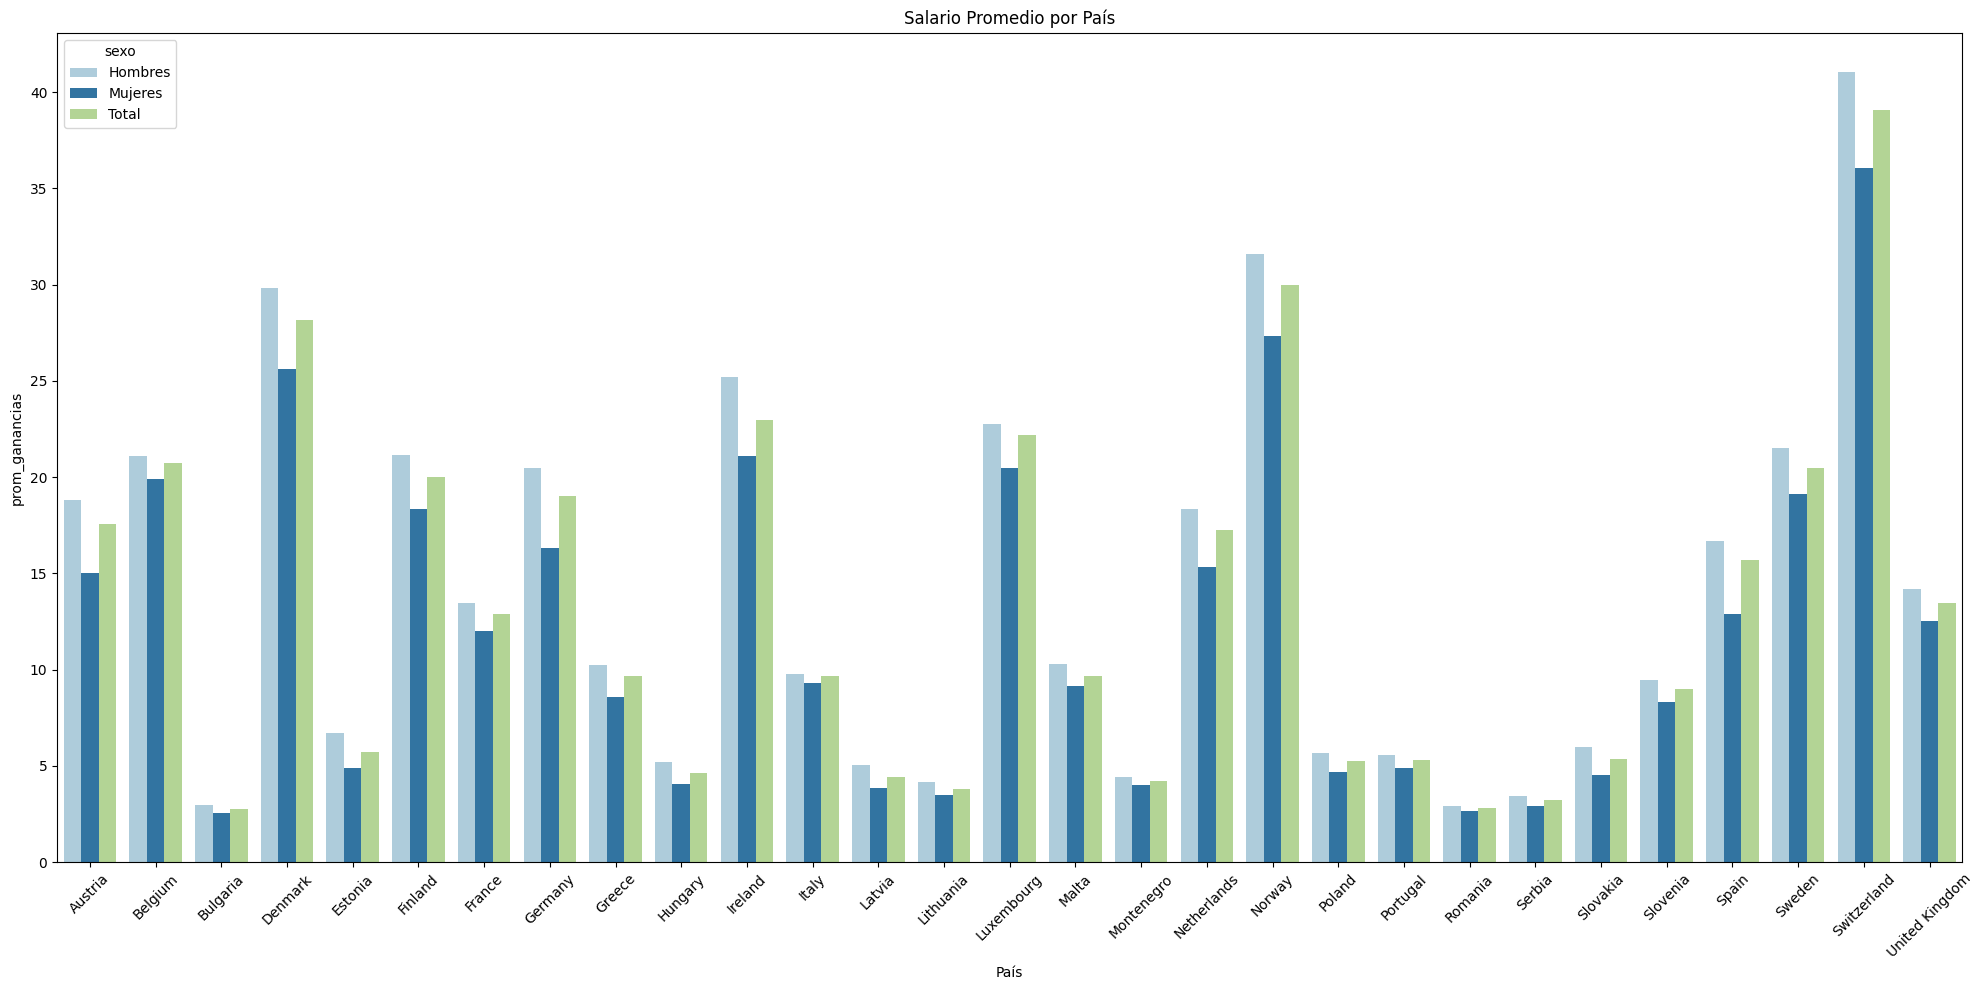

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x='País', y='prom_ganancias', hue='sexo', data=df4, ci=None)
plt.title('Salario Promedio por País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Este gráfico de barras en la que nos muestra el promedio de ganancias por países podemos observar que en el caso de las mujeres se gana menos dinero por hora, en este primer gráfico, se puede ver que los países con salarios más bajos son mas igualitarios o el caso de Bélgica. Suiza siendo el país que mas gana y parece que más brecha de genero que existe, sin embargo, Rumanía parece el más igualitario y con salarios más bajos.


### Relación Salario Profesión Género

In [26]:
df4fem= df4[df4['sexo']=='Mujeres']
df4fem['nivel_laboral'].value_counts()

nivel_laboral
Directores y gerentes                                                            29
Ocupaciones elementales                                                          29
Operadores de instalaciones y máquinas y ensambladores                          29
Oficiales, operarios y artesanos de artes mecánicas y de otros oficios          29
Total                                                                            29
Técnicos y profesionales de nivel medio                                         29
Personal de apoyo administrativo                                                 29
Profesionales científicos e intelectuales                                       29
Trabajadores de los servicios y vendedores de comercios y mercados               29
Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros    22
Ocupaciones militares                                                             6
No clasificado                                                

In [27]:
df4masc= df4[df4['sexo']=='Hombres']
df4masc['nivel_laboral'].value_counts()

nivel_laboral
Directores y gerentes                                                            29
Ocupaciones elementales                                                          29
Personal de apoyo administrativo                                                 29
Oficiales, operarios y artesanos de artes mecánicas y de otros oficios          29
Total                                                                            29
Trabajadores de los servicios y vendedores de comercios y mercados               29
Técnicos y profesionales de nivel medio                                         29
Profesionales científicos e intelectuales                                       29
Operadores de instalaciones y máquinas y ensambladores                          28
Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros    22
Ocupaciones militares                                                             6
No clasificado                                                

He comprobado si hay la misma cantidad de hombres y mujeres para no sesgar los resultados

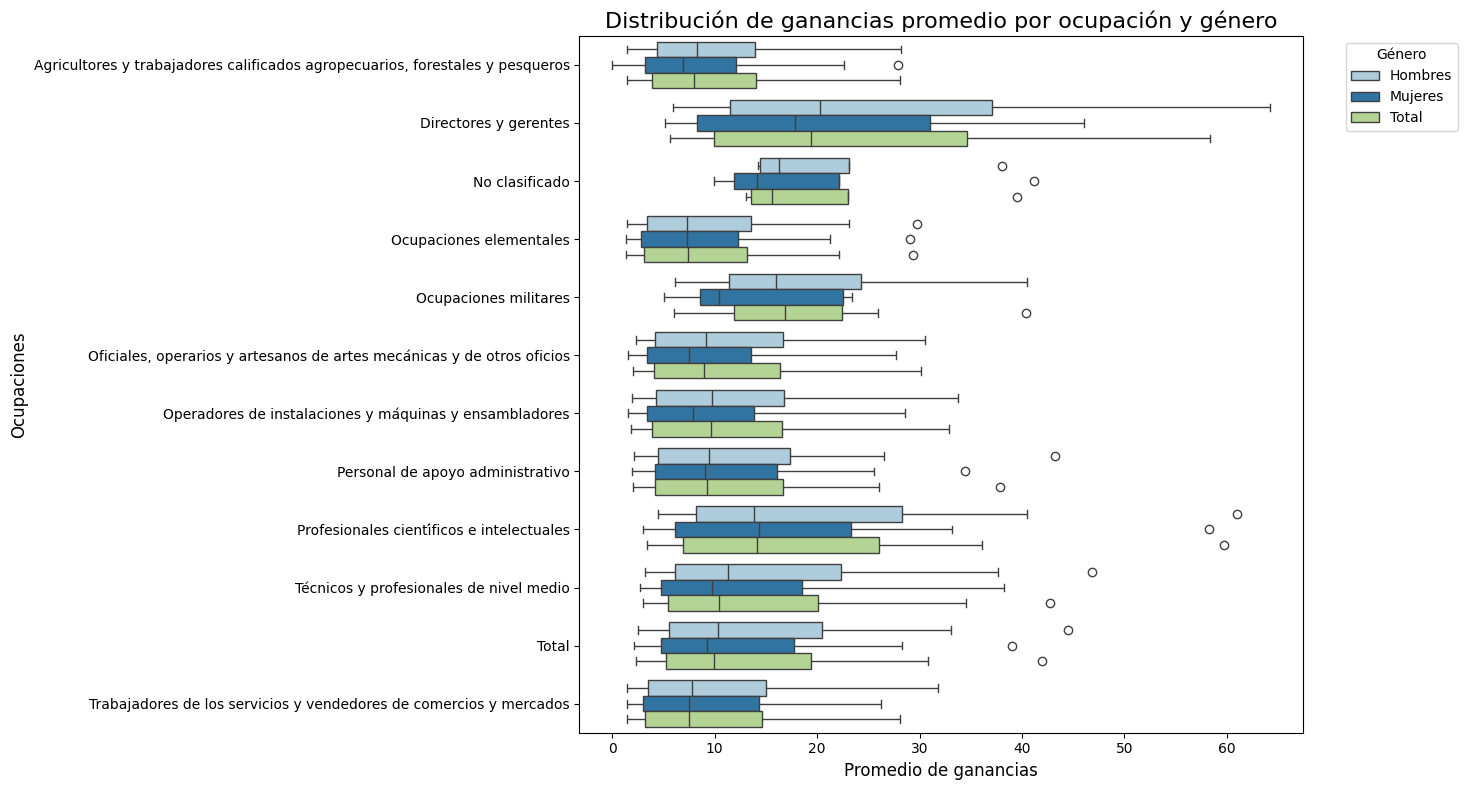

In [28]:
plt.figure(figsize=(15, 8))  # Tamaño ajustado
sns.set_palette("Paired")  # Colores más claros y contrastantes

sns.boxplot(data=df4, x="prom_ganancias", y="nivel_laboral", hue="sexo", orient="h")

# Mejorar etiquetas y títulos
plt.title("Distribución de ganancias promedio por ocupación y género", fontsize=16)
plt.xlabel("Promedio de ganancias", fontsize=12)
plt.ylabel("Ocupaciones", fontsize=12)

# Ajustar leyenda
plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajustar diseño
plt.tight_layout()  # Evitar solapamientos
plt.show()
#plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\histogram_mpg_over_6_cyl.png')



Este gráfico boxplot por grupos nos muestra la distribución de las ganancias promedio clasificado por profesión, en comparación con los países, las diferencias son menores.

- Directores y gerentes:

    Los hombres tienen una mediana más alta que las mujeres, indicando una disparidad en los salarios centrales.Por otro lado, los hombres tienen mayor IQR, lo que significa que las ganancias son más variables, sin embargo, las mujeres presentan un rango más comprimido, reflejando menor variabilidad.
 
- Profesionales científicos e intelectuales:

    La mediana de las mujeres esta un poco por encima de los hombres, por lo que la brecha salarial entre profesionales y cientificos es menor que en directores y gerentes. Cabe destacar que los hombres tienen un rango intercuartílico más amplio, menor que las mujeres, ademas se encuentra desplazada a la derecha. Tiene algunos  outliers superiores (particularmente en hombres).
- Técnicos y profesionales de nivel medio:

    La mediana de los hombres es mayor que la de las mujeres, aunque las diferencias no son muy destacables, tienen unos rangos muy parecidos por lo que la variabilidad en las ganancias es similar. Existen algunos outliers en hombres y mujeres, pero no tan pronunciados como en los profesionales cientificos e intelectuales.

- Personal de apoyo administrativo:

    Las ganancias centrales de hombres y mujeres son similares, reflejando una menor disparidad de género. Ambos géneros tienen rangos comprimidos, indicando menos variabilidad en las ganancias. Existen algunos outliers en ambos géneros, pero no muy extremos.

- Trabajadores de los servicios y vendedores de comercios y mercados:

  Los hombres tienen una mediana más alta, pero la diferencia con las mujeres es pequeña. Hombres y mujeres tienen IQR similares, reflejando rangos de ganancias similares, sin embargo, la disparidad de los hombres es mayor.
   
- Oficiales, Operarios y artesanos de artes mecánicas y de otros oficios:

    La mediana de los hombres es considerablemente mayor que la de las mujeres.Ademas el IQR de los hombres es amplio, lo que sugiere variabilidad en los salarios en comparación con el de las mujeres, ya que su rango es mucho más corto.
   
- Operadores de instalaciones y máquinas y ensambladores:

    Los hombres tienen una mediana más alta que las mujeres, ambos géneros tienen IQR similares, pero el rango de los hombres es un poco más amplio.

- Ocupaciones elementales:

   Ambos sexos tienen una mediana muy similar, por otro lado, tienen rangos comprimidos, lo que existe poca variabilidad de ganancias, sin embargo, el de los hombres esta ligeramente desplazado a las derechas. Se puede observar que existen algunos Outliers.

- Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros:

    Los hombres tienen una mediana más alta que las mujeres, reflejando una notable disparidad, ademas existe una mayor dispersión en los hombres, indicando más variabilidad en los salarios. El rango de las mujeres es más comprimido, por lo que la variabilidd de salarios es menor, por otro lado presenta outliers que se asemeja al extremo de boxplot de hombres.
    
- Ocupaciones militares:

    La mediana de los hombres es mucho mayor a la de las mujeres, por otro lado, las mujeres muestran un rango más comprimido que el de los hombres, por lo que la variabilidad de ganancias en loshombres es mucho mayor que en el de las mujeres, lo que podría indicar que mayoritariamnete solo llegan hombres a los altos rangos militares. 
    
- No Clasificado:

    Los hombres tienen una mediana más alta que las mujeres, sin embargo, ambos sexos tienen un ranfo muy comprimido, coincidiendo su tercer cuartil con el extremo del boxplot. El boxplot de las hombres se encuentra ligeramente desplazado a la derecha.
        
- Conclusión estadística general:
    
    Mayoritariamente se puede observar una diferencia en los salarios de los hombres y las mujeres, donde el salario de los hombres es ligeramente superior, no existe unas evidencias tan claras como en la comparación entre países. Si que existe diferencias más evidentes en profesiones como Directores, esto se puede deber que por problemas de conciliación la mujer tiene menos acceso a estos puestos. Tambien existe una diferencia más evidente en ocupaciones militares, puede ser influido por razones históricas y culturales  o  los agricultores.
    El resto de profesiones existe una brecha salarial menor.
    

In [29]:
dfmapa = df4.dropna(subset=['prom_ganancias'])

def normalize_country_name(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return country_name

dfmapa['País'] = dfmapa['País'].apply(normalize_country_name)

# Crear el gráfico choropleth con más opciones de personalización
fig = px.choropleth(dfmapa,
    locations='País',
    locationmode='ISO-3', # Especifica que usamos códigos ISO de 3 letras
    color='prom_ganancias',
    color_continuous_scale='Viridis', # Escala de colores (puedes usar: 'RdYlBu', 'Viridis', 'Plasma', etc.)
    hover_name='País',
    projection='natural earth',
    title='Distribución de las Ganancias Promedias por País',
    height=600,
    width=1000)

# Personalizar el diseño
fig.update_layout(
    coloraxis_colorbar_title='Ganancias',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    title=dict(
        font=dict(size=24),
        x=0.5,
        xanchor='center'
    )
)

# Mostrar el gráfico
fig.show()

### Prueba ANOVA 

In [30]:
#Diferencia entre sexos
filtered_data = df4.dropna(subset=['prom_ganancias'])
# Agrupar los datos por sexo y obtener las ganancias
groups_by_sex = filtered_data.groupby('sexo')['prom_ganancias'].apply(list)
# Realizar la prueba ANOVA si hay más de un grupo único
anova_result = None
if len(groups_by_sex) > 1:
    anova_result = f_oneway(*groups_by_sex)

groups_by_sex.describe(), anova_result

(count                                                     3
 unique                                                    3
 top       [17.55, 36.86, 25.51, 20.15, 16.4, 12.05, 14.6...
 freq                                                      1
 Name: prom_ganancias, dtype: object,
 F_onewayResult(statistic=np.float64(2.9376684983948715), pvalue=np.float64(0.053510789040127384)))

In [31]:
# Agrupar los datos por nivel laboral y obtener las ganancias
groups_by_level = filtered_data.groupby('nivel_laboral')['prom_ganancias'].apply(list)

# Realizar la prueba ANOVA si hay más de un grupo único
anova_result_level = None
if len(groups_by_level) > 1:
    anova_result_level = f_oneway(*groups_by_level)

groups_by_level.describe(), anova_result_level


(count                                                    12
 unique                                                   12
 top       [4.29, 4.21, 4.44, 28.13, 28.18, 27.88, 12.53,...
 freq                                                      1
 Name: prom_ganancias, dtype: object,
 F_onewayResult(statistic=np.float64(15.307735689069892), pvalue=np.float64(1.6427884477269566e-27)))

La prueba ANOVA (Análisis de Varianza) se utiliza para comparar las medias de tres o más grupos y determinar si hay diferencias significativas entre ellas.
- Prueba ANOVA entre sexos:
    - Estadístico F: 2.94: el F de 2.94 indica que hay algunas diferencias entre los géneros, pero no son lo suficientemente grandes como para ser consideradas estadísticamente significativas.

    - Valor p: 0.053:  El valor p está cercano a 0.05, lo que sugiere que existe una tendencia a diferencias significativas en las ganancias promedio entre los géneros, pero no alcanza el umbral típico de significancia estadística (p<0,05)
- Prueba ANOVA entre niveles laborales:
    - Estadístico F: 15.31: confirma que las diferencias entre los grupos (niveles laborales) son mucho mayores que las diferencias dentro de los grupos.
    - Valor p: 1.64×10−27: que es prácticamente 0, es extremadamente bajo, mucho menor que 0.05. Esto significa que hay diferencias muy significativas entre los niveles laborales en cuanto a las ganancias promedio.


# Analisis Regresión España

In [37]:
esp= df[df['País'].str.contains('Spain', regex=False)]

In [38]:
esp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 705 to 974
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   País               270 non-null    category
 1   sexo               270 non-null    category
 2   nivel_laboral      270 non-null    category
 3   año                270 non-null    int32   
 4   prom_ganancias     270 non-null    float64 
 5   moneda             270 non-null    category
 6   note_source.label  270 non-null    category
dtypes: category(5), float64(1), int32(1)
memory usage: 10.3 KB


In [39]:
esp.head()

,País,sexo,nivel_laboral,año,prom_ganancias,moneda,note_source.label
705,Spain,Total,Total,2021,17.0,Job coverage: Main job currently held | Workin...,Economic activity coverage: Excluding agricult...
706,Spain,Total,Directores y gerentes,2021,35.0,Job coverage: Main job currently held | Workin...,Economic activity coverage: Excluding agricult...
707,Spain,Total,Profesionales científicos e intelectuales,2021,25.0,Job coverage: Main job currently held | Workin...,Economic activity coverage: Excluding agricult...
708,Spain,Total,Técnicos y profesionales de nivel medio,2021,19.0,Job coverage: Main job currently held | Workin...,Economic activity coverage: Excluding agricult...
709,Spain,Total,Personal de apoyo administrativo,2021,14.0,Job coverage: Main job currently held | Workin...,Economic activity coverage: Excluding agricult...


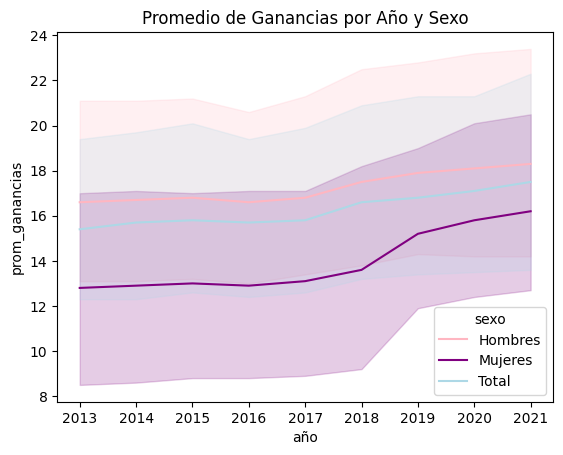

In [40]:
sns.lineplot(data=esp, x='año', y='prom_ganancias', hue='sexo', palette=["lightpink","purple", "lightblue"])

plt.title('Promedio de Ganancias por Año y Sexo')
plt.show()

# 3. Tratamiento de perdidos

In [42]:
print(df4.isnull().sum())

País                 0
sexo                 0
nivel_laboral        0
año                  0
prom_ganancias       1
moneda               0
note_source.label    0
dtype: int64


In [43]:
filas_con_perdidos = df4[df4.isna().any(axis=1)]
filas_con_perdidos

,País,sexo,nivel_laboral,año,prom_ganancias,moneda,note_source.label
577,Switzerland,Mujeres,Ocupaciones militares,2014,NaN,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...


<Figure size 1000x600 with 0 Axes>

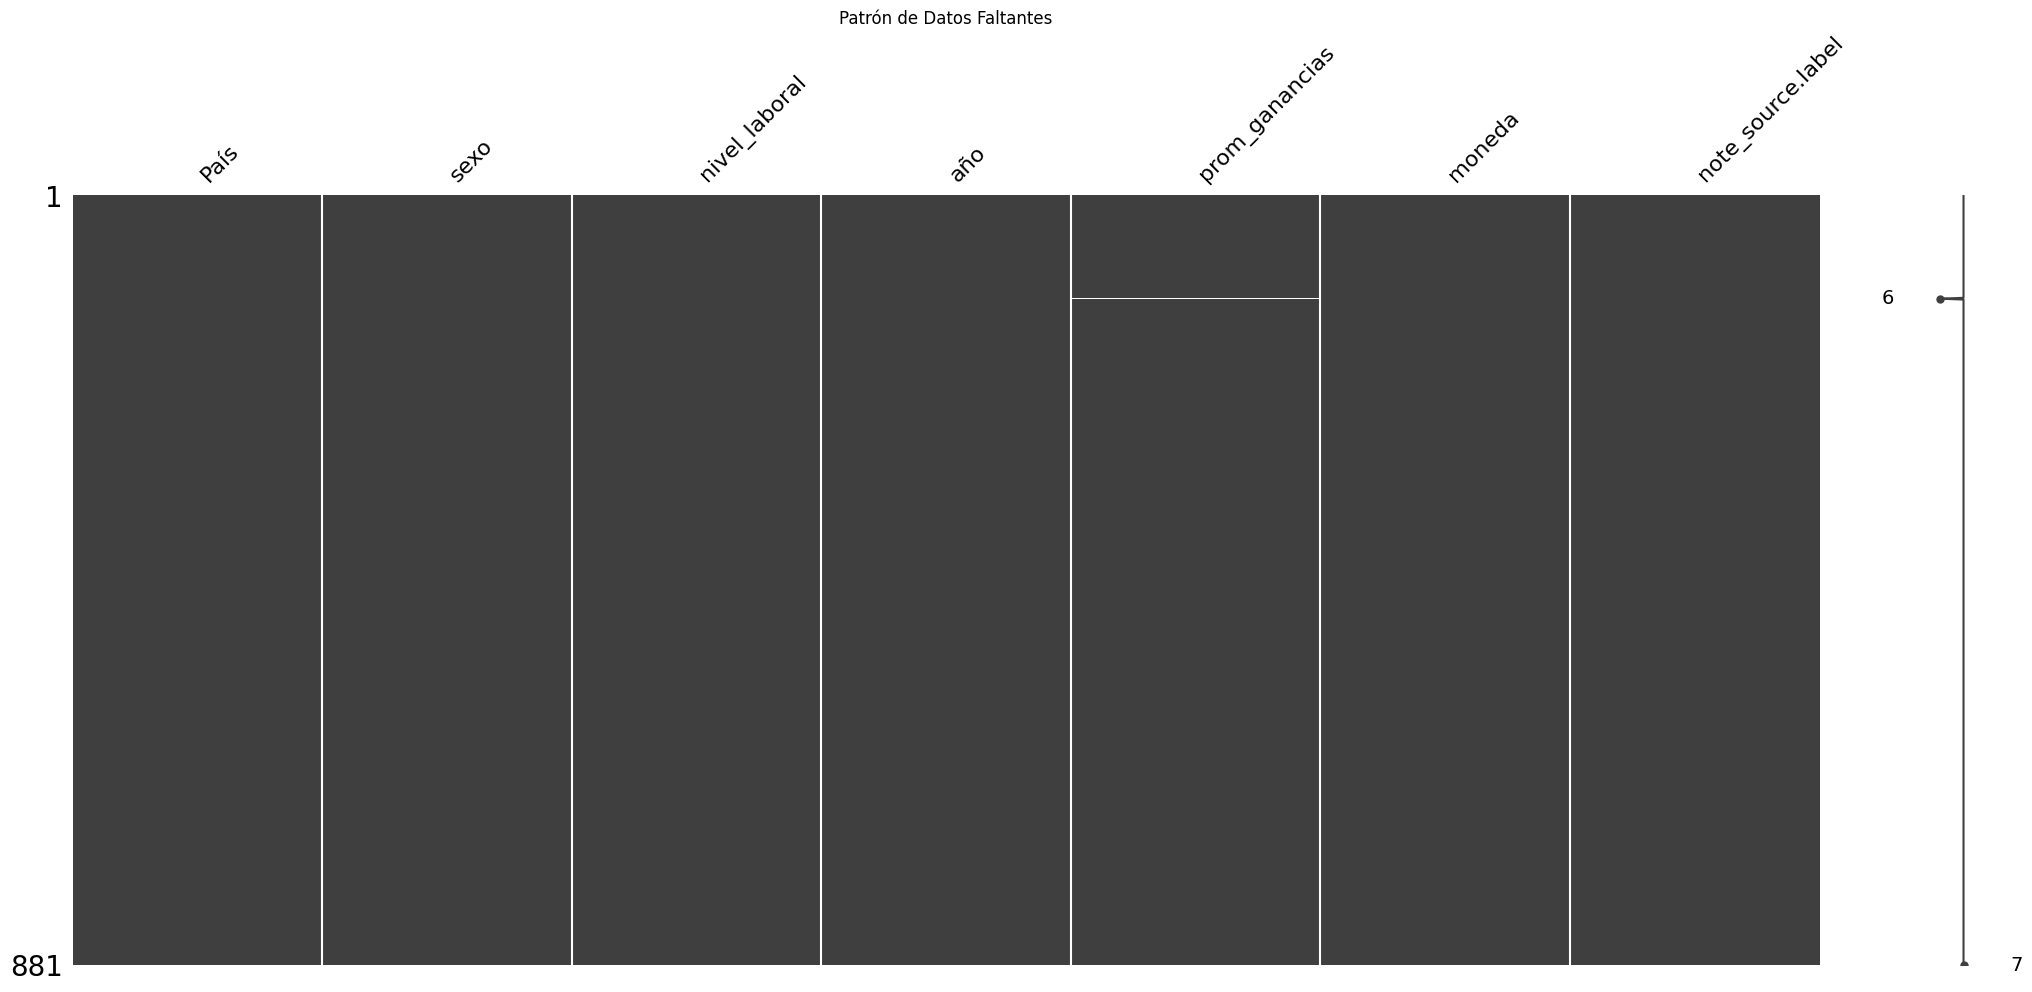

In [44]:
plt.figure(figsize=(10,6))
msno.matrix(df4)
plt.title('Patrón de Datos Faltantes')
plt.show();

In [45]:
df5 = df4.loc[(df4['País'] == 'Switzerland') & (df4['sexo'] == 'Mujeres')]

df5

,País,sexo,nivel_laboral,año,prom_ganancias,moneda,note_source.label
567,Switzerland,Mujeres,Total,2014,39.05,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
568,Switzerland,Mujeres,Directores y gerentes,2014,46.02,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
569,Switzerland,Mujeres,Profesionales científicos e intelectuales,2014,58.25,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
570,Switzerland,Mujeres,Técnicos y profesionales de nivel medio,2014,38.25,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
571,Switzerland,Mujeres,Personal de apoyo administrativo,2014,34.48,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
572,Switzerland,Mujeres,Trabajadores de los servicios y vendedores de ...,2014,26.22,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
573,Switzerland,Mujeres,Agricultores y trabajadores calificados agrope...,2014,27.88,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
574,Switzerland,Mujeres,"Oficiales, operarios y artesanos de artes meca...",2014,27.71,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
575,Switzerland,Mujeres,Operadores de instalaciones y máquinas y ensa...,2014,28.62,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
576,Switzerland,Mujeres,Ocupaciones elementales,2014,29.10,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...


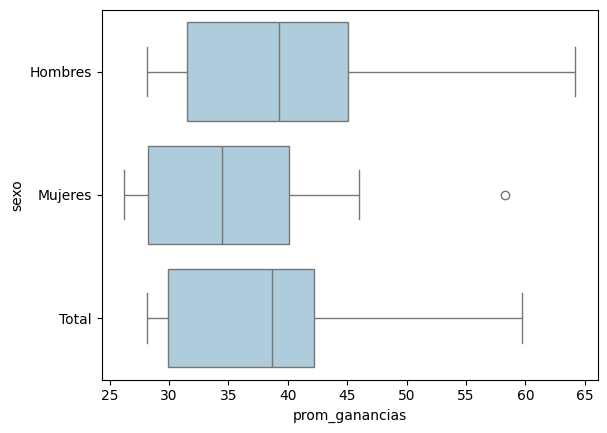

In [46]:
df6=df4.loc[(df4['País'] == 'Switzerland')]
sns.boxplot(data=df6, x="prom_ganancias", y="sexo", orient="h")
plt.show();

Este boxplot muestra si hay outliers para poder saber cual es la medida estadistica más adecuada para rellenar el NA

In [47]:
#Tratamiento MAR
#al ser solo un dato faltante y haber tanta disparidad de promedio de ganancias según el país y el sexo he realizado la mediana, ya que presenta outliers en los datos de mujer.
df4['prom_ganancias']=df4['prom_ganancias'].fillna(df5['prom_ganancias'].median())

In [48]:
df5.prom_ganancias.median()

np.float64(34.48)

In [49]:
df4[df4['País'] == 'Switzerland']

,País,sexo,nivel_laboral,año,prom_ganancias,moneda,note_source.label
543,Switzerland,Total,Total,2014,41.97,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
544,Switzerland,Total,Directores y gerentes,2014,58.37,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
545,Switzerland,Total,Profesionales científicos e intelectuales,2014,59.69,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
546,Switzerland,Total,Técnicos y profesionales de nivel medio,2014,42.76,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
547,Switzerland,Total,Personal de apoyo administrativo,2014,37.81,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
548,Switzerland,Total,Trabajadores de los servicios y vendedores de ...,2014,28.13,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
549,Switzerland,Total,Agricultores y trabajadores calificados agrope...,2014,28.13,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
550,Switzerland,Total,"Oficiales, operarios y artesanos de artes meca...",2014,30.14,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
551,Switzerland,Total,Operadores de instalaciones y máquinas y ensa...,2014,32.89,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
552,Switzerland,Total,Ocupaciones elementales,2014,29.36,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...


De esta manera comprobamos si la imputación ha sido correcta. Podemos observar que el Na ha sido sustituido por la mediana (34,48)

In [50]:
filas_con_perdidos1 = df[df.isna().any(axis=1)]
filas_con_perdidos1

,País,sexo,nivel_laboral,año,prom_ganancias,moneda,note_source.label
253,Switzerland,Mujeres,Ocupaciones militares,2023,NaN,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
289,Switzerland,Mujeres,Ocupaciones militares,2022,NaN,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
325,Switzerland,Mujeres,Ocupaciones militares,2021,NaN,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
361,Switzerland,Mujeres,Ocupaciones militares,2020,NaN,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
397,Switzerland,Mujeres,Ocupaciones militares,2019,NaN,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
433,Switzerland,Mujeres,Ocupaciones militares,2018,NaN,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
577,Switzerland,Mujeres,Ocupaciones militares,2014,NaN,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
1609,United Kingdom of Great Britain and Northern I...,Mujeres,Ocupaciones militares,2023,NaN,Currency: GBR - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
1622,United Kingdom of Great Britain and Northern I...,Total,No clasificado,2022,NaN,Currency: GBR - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
1634,United Kingdom of Great Britain and Northern I...,Hombres,No clasificado,2022,NaN,Currency: GBR - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...


Es  curioso que observando los datos faltantes, sobretodo falte en las ocupaciones militares en el caso de las mujeres. Por ejemplo, en Suiza, la falta de datos sobre las mujeres en trabajos militares se debe principalmente a que el servicio militar es obligatorio para hombres y voluntario para mujeres, por lo que el número de mujeres es muy limitado. Ademas existen barreras patriarcales e históricas que dificulta a las mujeres a los roles de combate y liderazgo. 



## Validación de imputación

## Tratamiento de 0

In [51]:
#Tratamiento de 0
df[df['prom_ganancias'] == 0]

,País,sexo,nivel_laboral,año,prom_ganancias,moneda,note_source.label
469,Switzerland,Mujeres,Ocupaciones militares,2017,0.0,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
505,Switzerland,Mujeres,Ocupaciones militares,2016,0.0,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
541,Switzerland,Mujeres,Ocupaciones militares,2015,0.0,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
613,Switzerland,Mujeres,Ocupaciones militares,2013,0.0,Currency: CHE - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
821,Spain,Mujeres,Agricultores y trabajadores calificados agrope...,2018,0.0,Job coverage: Main job currently held | Workin...,Economic activity coverage: Excluding agricult...
851,Spain,Mujeres,Agricultores y trabajadores calificados agrope...,2017,0.0,Job coverage: Main job currently held | Workin...,Economic activity coverage: Excluding agricult...
881,Spain,Mujeres,Agricultores y trabajadores calificados agrope...,2016,0.0,Job coverage: Main job currently held | Workin...,Economic activity coverage: Excluding agricult...
911,Spain,Mujeres,Agricultores y trabajadores calificados agrope...,2015,0.0,Job coverage: Main job currently held | Workin...,Economic activity coverage: Excluding agricult...
941,Spain,Mujeres,Agricultores y trabajadores calificados agrope...,2014,0.0,Job coverage: Main job currently held | Workin...,Economic activity coverage: Excluding agricult...
971,Spain,Mujeres,Agricultores y trabajadores calificados agrope...,2013,0.0,Job coverage: Main job currently held | Workin...,Economic activity coverage: Excluding agricult...


## 4. Análisis Descriptivo

In [52]:
# Seleccionar solo las columnas numéricas
df4numericas = df4.select_dtypes(include=['number'])

# Calcular la media
media = df4numericas.mean()


In [53]:
# Medidas de tendencia central
media = df4numericas.mean()
mediana = df4numericas.median()
moda = df4numericas.mode().iloc[0] if not df4numericas.mode().empty else None

# Medidas de dispersión
varianza = df4numericas.var()
desviacion_std = df4numericas.std()
rango = df4numericas.max() - df4numericas.min()

# Medidas de forma
asimetria = skew(df4numericas)
curtosis = kurtosis(df4numericas)

# Percentiles
percentiles = np.percentile(df4numericas, [25, 50, 75])

# Resultados
{
    "Medidas de tendencia central": {
        "Media": media,
        "Mediana": mediana,
        "Moda": moda,
    },
    "Medidas de dispersión": {
        "Varianza": varianza,
        "Desviación estándar": desviacion_std,
        "Rango": rango,
    },
    "Medidas de forma": {
        "Asimetría": asimetria,
        "Curtosis": curtosis,
    },
    "Percentiles": {
        "25%": percentiles[0],
        "50% (Mediana)": percentiles[1],
        "75%": percentiles[2],
    }
}

{'Medidas de tendencia central': {'Media': año               2014.000000
  prom_ganancias      13.364915
  dtype: float64,
  'Mediana': año               2014.00
  prom_ganancias      10.45
  dtype: float64,
  'Moda': año               2014.0
  prom_ganancias      13.0
  Name: 0, dtype: float64},
 'Medidas de dispersión': {'Varianza': año                 0.000000
  prom_ganancias    115.431273
  dtype: float64,
  'Desviación estándar': año                0.000000
  prom_ganancias    10.743895
  dtype: float64,
  'Rango': año                0.00
  prom_ganancias    64.19
  dtype: float64},
 'Medidas de forma': {'Asimetría': array([       nan, 1.40085186]),
  'Curtosis': array([       nan, 2.21122567])},
 'Percentiles': {'25%': np.float64(10.4675),
  '50% (Mediana)': np.float64(1039.095),
  '75%': np.float64(2014.0)}}

### Visualizaciones

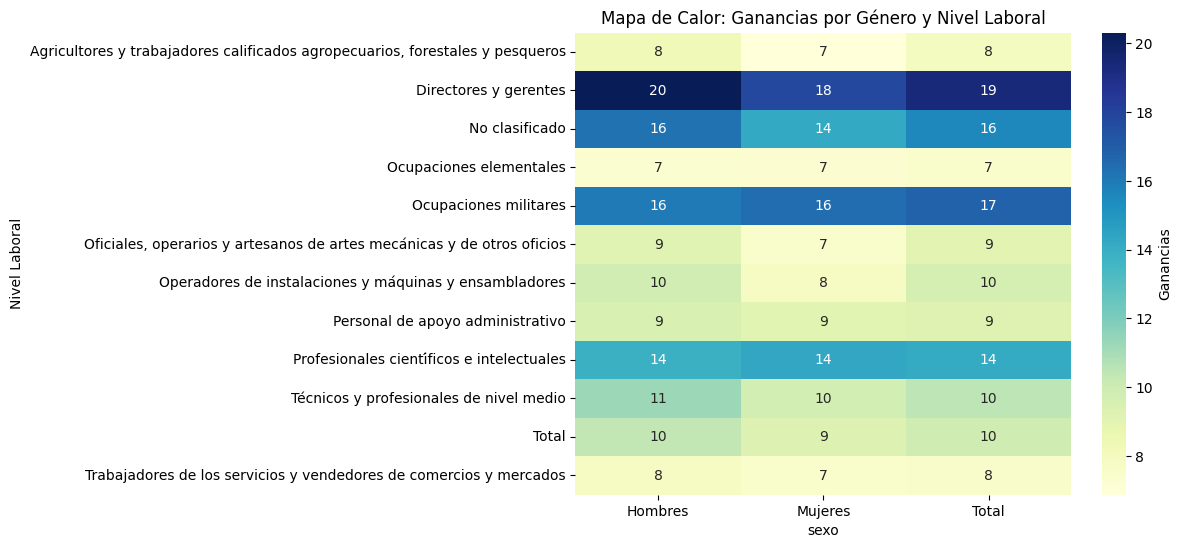

In [62]:
# Crear una tabla pivote
pivot_table = df4.pivot_table(values="prom_ganancias", index="nivel_laboral", columns="sexo", aggfunc="median")

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Ganancias'})
plt.title("Mapa de Calor: Ganancias por Género y Nivel Laboral")
plt.xlabel("sexo")
plt.ylabel("Nivel Laboral")
plt.show()

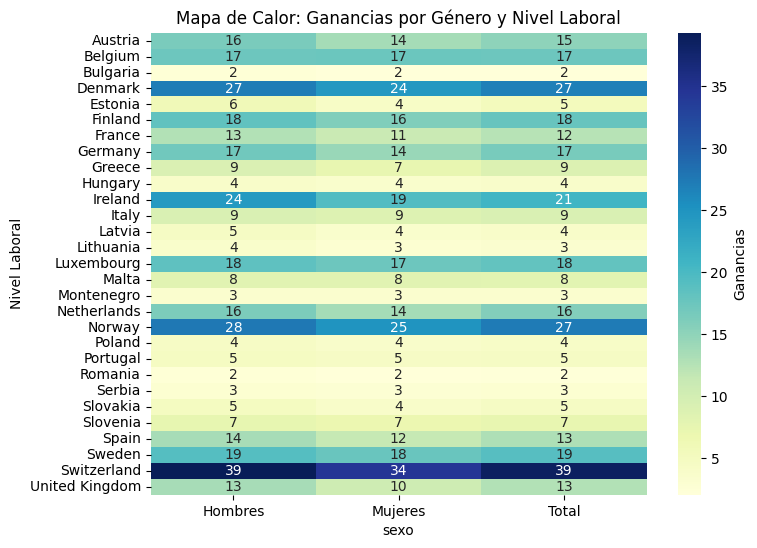

In [64]:
# Crear una tabla pivote
pivot_table = df4.pivot_table(values="prom_ganancias", index="País", columns="sexo", aggfunc="median")

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Ganancias'})
plt.title("Mapa de Calor: Ganancias por Género y Nivel Laboral")
plt.xlabel("sexo")
plt.ylabel("Nivel Laboral")
plt.show()